
Source: [kaggle](https://www.kaggle.com/code/vincentman0403/sentimental-analysis-on-imdb-by-lstm)

**This kernel downloads Keras IMDB dataset and trains LSTM to do sentimental analysis.**

In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

## Load IMDB from Keras dataset

In [2]:
# Vocabulary size is 2000
from config import (MAX_SEQUENCE_LENGTH, NUM_DISTINCT_WORDS, 
                    EMBEDDING_OUTPUT_DIMS,DEFAULT_WORD_ID, INDEX_FROM)


(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=NUM_DISTINCT_WORDS,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      # seed=113,
                                                      start_char=DEFAULT_WORD_ID['<start>'],
                                                      oov_char=DEFAULT_WORD_ID['<unk>'],
                                                      index_from=INDEX_FROM)

## Pad the sequence to the same length

In [3]:
max_review_length = 600 # 100 250
X_train = sequence.pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, 
                                 value = DEFAULT_WORD_ID["<pad>"])
X_test = sequence.pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, 
                                value = DEFAULT_WORD_ID["<pad>"])

## Create and compile model

In [4]:
model = Sequential()
model.add(Embedding(input_dim=NUM_DISTINCT_WORDS, 
                    output_dim=EMBEDDING_OUTPUT_DIMS, 
                    input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2024-08-20 21:53:37.878320: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 128)          2176000   
                                                                 
 dropout (Dropout)           (None, 700, 128)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,340,865
Trainable params: 2,340,865
Non-

## Fit model

In [5]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# add EarlyStopping and ModelCheckpoint 
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

train_history = model.fit(X_train, y_train, batch_size=32,
                          epochs=30, verbose=2,
                          validation_split=0.2, callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/30


KeyboardInterrupt: 

## Show train and validation history: loss and accuracy

In [ ]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

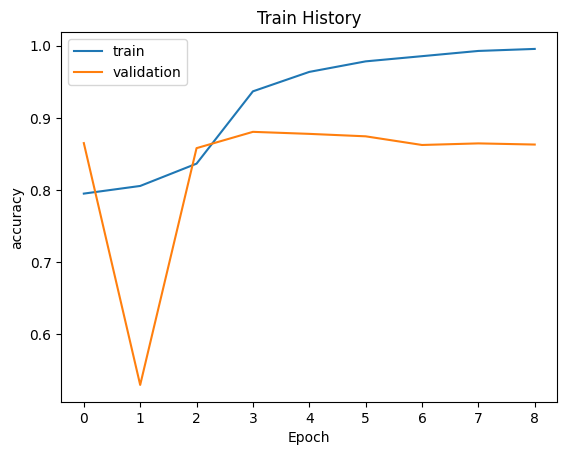

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

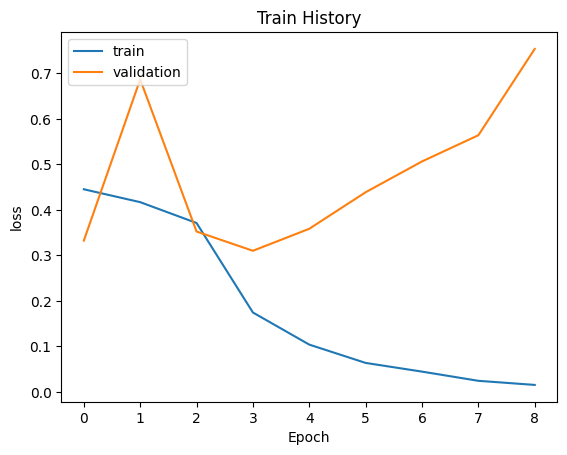

In [ ]:
show_train_history(train_history,'loss','val_loss')

In [ ]:
model.save("./models/imdb_lstm_model.h5")


## Evaluate model by test set

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
scores[1]

782/782 [==============================] - 15s 19ms/step - loss: 0.8130 - accuracy: 0.8525


0.8525199890136719

## Predict test data

In [ ]:
predict=model.predict(X_test)
predict_classes=predict.reshape(len(X_test))

NameError: name 'MAX_SEQUENCE_LENGTH' is not defined

In [ ]:
def get_original_text(i):
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id.update(DEFAULT_WORD_ID)
    
    id_to_word = {value:key for key,value in word_to_id.items()}
    return ' '.join(id_to_word[id] for id in X_test[i])

In [ ]:
SentimentDict={1:'positive', 0:'negative'}
def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[round(predict_classes[i])])

In [ ]:
display_test_sentiment(3)

<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

In [ ]:
display_test_sentiment(13000)

<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

In [ ]:
from predictor_xm import Predictor
pre_lstm = Predictor(model_dir="models/imdb_lstm_model.h5")

Loaded model from disk models/imdb_lstm_model.h5


#### Test word_to_id and id2word

In [ ]:
print(pre_lstm.id2word(X_train[0]))
# test word_to_id and id2word
print([pre_lstm.word_to_id[word] for word in pre_lstm.id2word(X_train[1]).split(' ')] == X_train[1])
print(pre_lstm.word2id(pre_lstm.id2word(X_train[1])) == X_train[1])

print(X_train[1])
print(pre_lstm.word2id(pre_lstm.id2word(X_train[1])))

<start> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <unk> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <unk> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be pr

In [ ]:
review = pre_lstm.id2word(X_train[0])
print(review)

print(pre_lstm.word2id(review))

print(pre_lstm.predict_single_text(review))

<start> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <unk> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <unk> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be pr